# Connecting to Oracle

<font size="4">Installing the cx_Oracle package</font>

In [3]:
!pip install cx_Oracle

<font size="4">Importing the libraries and setting the Oracle Client address</font>

In [4]:
import cx_Oracle
import os
directory_path = os.getcwd() + "\instantclient-basic-windows.x64-21.3.0.0.0\instantclient_21_3" 
cx_Oracle.init_oracle_client(lib_dir= directory_path)

ProgrammingError: Oracle Client library has already been initialized

<font size="4">Creating a connection to Oracle</font>

In [5]:
my_username = "by1855j"
my_password = "by1855j"
connection = cx_Oracle.connect(user=my_username, password=my_password, dsn="OBIWAN")

<font size="4">Establishing the connection</font>

In [11]:
from pandas import DataFrame
with connection.cursor() as cursor:
    cursor.execute("select WSENSOR_ID,LOCATION_ID,TIME_ID,Result from fact_table where WSENSOR_ID=111 ")
    df = DataFrame(cursor.fetchall())
    df.columns = [x[0] for x in cursor.description]
    print("I got %d lines " % len(df))

I got 1525 lines 


In [12]:
df

,WSENSOR_ID,LOCATION_ID,TIME_ID,RESULT
0,111,AN-011396,2000-01-04T14:10:00,10.400
1,111,AN-011396,2000-06-28T13:20:00,6.220
2,111,AN-011396,2000-11-15T14:50:00,3.580
3,111,AN-011396,2001-04-11T11:35:00,6.240
4,111,AN-01M02,2013-02-11T13:39:00,0.093
...,...,...,...,...
1520,111,NE-45401488,2014-10-06T08:32:00,0.030
1521,111,NE-45401488,2014-11-03T12:33:00,0.040
1522,111,NE-45401488,2014-11-27T10:08:00,0.099
1523,111,NE-454F1115,2014-06-20T10:29:00,0.030


<font size="4">Importing the libraries</font>

In [13]:
#importing preprocessing from sklearn
from sklearn import preprocessing

In [14]:
#Label Encoding
#converting each value in a column to a number
for column in df.columns:
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [15]:
#checking the shape
df.shape

(1525, 4)

In [16]:
df

,WSENSOR_ID,LOCATION_ID,TIME_ID,RESULT
0,0,0,1,342
1,0,0,30,325
2,0,0,54,304
3,0,0,81,326
4,0,6,1057,65
...,...,...,...,...
1520,0,77,1210,2
1521,0,77,1216,12
1522,0,77,1224,70
1523,0,78,1188,2


<font size="4">Splitting the data</font>


In [17]:
#independent variable array
X = df.iloc[:,1:3].values
#dependent variable vector
y = df.iloc[:,3].values

In [18]:
X

array([[   0,    1],
       [   0,   30],
       [   0,   54],
       ...,
       [  77, 1224],
       [  78, 1188],
       [  78, 1209]])

In [19]:
y

array([342, 325, 304, ...,  70,   2,   2], dtype=int64)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=13)

<font size="4">Fitting KNN Algorithm model into the training set</font>


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [59]:
#accuracy
print(round(knn.score(X_test, y_test),4)*100,'%')

34.72 %


In [66]:
#Cross Validation
from sklearn.model_selection import cross_val_score
neighbors=[]
cv_scores=[]
#performing 23-fold cross validation with K=13 for KNN
for k in range(1,53,4):
    neighbors.append(k)
    knn1=KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
       knn1,X_train,y_train,cv=23,scoring='accuracy')
    cv_scores.append(scores.mean())
scores=cross_val_score(knn1,X,y,cv=23,scoring='accuracy')
print(scores)


C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=23.
  warnings.warn(("The least populated class in y has only %d"
C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=23.
  warnings.warn(("The least populated class in y has only %d"
C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=23.
  warnings.warn(("The least populated class in y has only %d"
C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=23.
  warnings.warn(("The least po

[0.28358209 0.32835821 0.32835821 0.32835821 0.32835821 0.31343284
 0.32835821 0.27272727 0.28787879 0.33333333 0.33333333 0.33333333
 0.31818182 0.33333333 0.33333333 0.34848485 0.34848485 0.34848485
 0.34848485 0.34848485 0.34848485 0.3030303  0.27272727]


C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=23.
  warnings.warn(("The least populated class in y has only %d"


In [62]:
import matplotlib.pyplot as plt

The optimal number of K neighbours = 37 


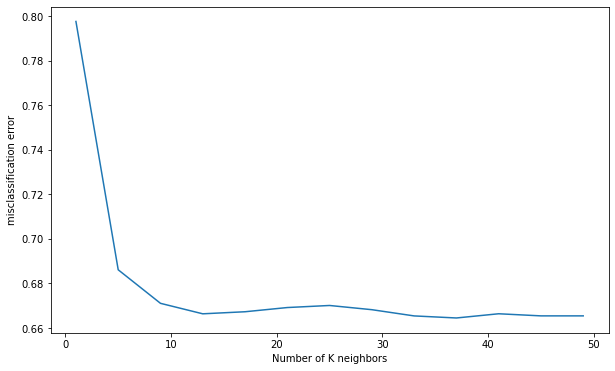

In [68]:
#misclassification error
mse=[1-x for x in cv_scores]
#determining the best k value
optimal_k=neighbors[mse.index(min(mse))]
print("The optimal number of K neighbours = %d " %optimal_k)
#plotting misclassification error
plt.figure(figsize=(10,6))
plt.plot(neighbors,mse)
plt.xlabel("Number of K neighbors")
plt.ylabel("misclassification error")
plt.show()

In [64]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report : \n")
print(classification_report(y_test,y_pred))


Classification Report : 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.35      0.99      0.52       158
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         2
 

C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
